In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("/content/Titanic_train.csv")
test = pd.read_csv("/content/Titanic_test.csv")


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train.drop(columns=['Name','SibSp','Parch','Fare','Cabin','Ticket'],inplace=True)

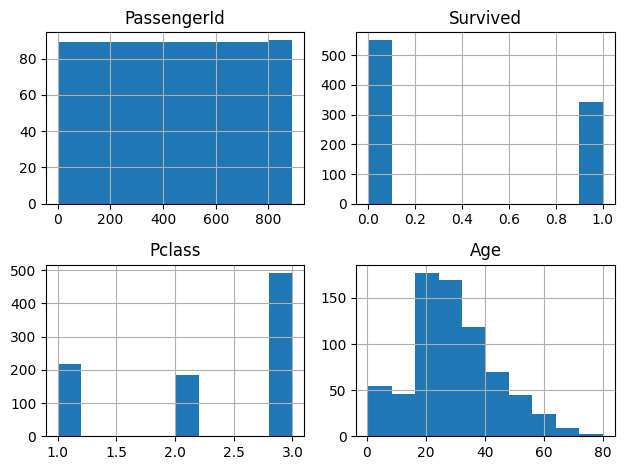

In [7]:
import matplotlib.pyplot as plt
train.hist()
plt.tight_layout()

<Axes: >

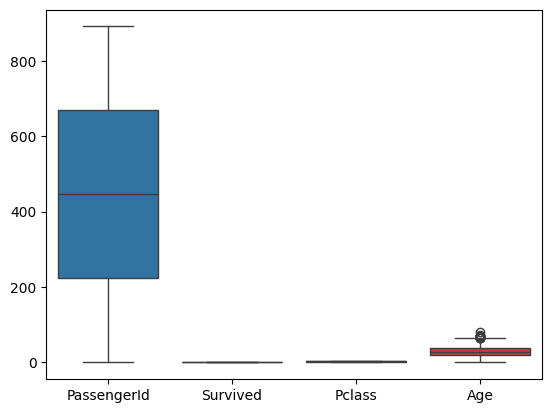

In [8]:
import seaborn as sns
sns.boxplot(train)

In [9]:
train.duplicated().sum()


0

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
dtype: int64

In [11]:
(177/891)*100

19.865319865319865

In [12]:
median1 = train['Age'].median()

In [13]:
train['Age'].fillna(median1 , inplace = True)

In [14]:
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S
...,...,...,...,...,...,...
886,887,0,2,male,27.0,S
887,888,1,1,female,19.0,S
888,889,0,3,female,28.0,S
889,890,1,1,male,26.0,C


In [15]:
from sklearn.preprocessing import LabelEncoder

Encode=LabelEncoder()

train.iloc[ : ,3]=Encode.fit_transform(train.iloc[:, 3])
train.iloc[ : ,5]=Encode.fit_transform(train.iloc[:, 5])

In [16]:
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,2
1,2,1,1,0,38.0,0
2,3,1,3,0,26.0,2
3,4,1,1,0,35.0,2
4,5,0,3,1,35.0,2
...,...,...,...,...,...,...
886,887,0,2,1,27.0,2
887,888,1,1,0,19.0,2
888,889,0,3,0,28.0,2
889,890,1,1,1,26.0,0


In [17]:
X = train.iloc[:, [0,2,3, 4, 5]]
Y = train.iloc[:, 1]

In [18]:
X

,PassengerId,Pclass,Sex,Age,Embarked
0,1,3,1,22.0,2
1,2,1,0,38.0,0
2,3,3,0,26.0,2
3,4,1,0,35.0,2
4,5,3,1,35.0,2
...,...,...,...,...,...
886,887,2,1,27.0,2
887,888,1,0,19.0,2
888,889,3,0,28.0,2
889,890,1,1,26.0,0


In [19]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [20]:
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [21]:
y_pred_df = pd.DataFrame({'Y':Y,'Yhat':classifier.predict(X)})

In [22]:
y_pred_df

,Y,Yhat
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,1


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[462  87]
 [ 99 243]]


In [24]:
((463+243)/(463+86+99+243))*100   #accuracy

79.2368125701459

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.74      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



# **ROC curve**

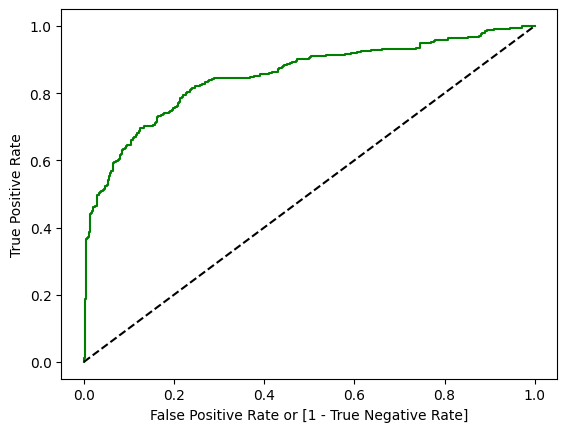

In [26]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
# we want to predict probability values for x data
# predict_proba returns probability estimates for all classes
# and the results are ordered by the label of classes i.e. 0 and 1.
# [:,1] will get the predicted probabilities of the positive label only
# here we will get false positive rate, true positive rate and threshold values
auc = roc_auc_score(Y, y_pred)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='Green')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # green one is roc curve

In [27]:
auc

0.7760281852171412

# **Interpretation**

we can observe the positive rate of curve through obtained result.  

The provided code performs data preprocessing, exploratory data analysis, and trains a logistic regression model to predict passenger survival on the Titanic. To discuss the significance of features in predicting the target variable, we can analyze the model coefficients and visualize the relationships between features and survival.


Deployment

In [28]:
import pickle

In [29]:
pickle.dump(classifier,open('classifier.pkl','wb'))